In [1]:
import sys
sys.path.append('.')

import common
from sklearn import tree
import os

root_dir = os.path.join("data", "20230721")
raw_data_perfix = "2023_07_21_all"

raw_data_file_path = os.path.join(root_dir, raw_data_perfix + ".csv")
raw_time_splits_path = os.path.join(root_dir, raw_data_perfix + ".json")

# APP_MAP = {"memcached": "k-v store", "keydb": "k-v store", "redis": "k-v store"}
APP_MAP = {}

X, Y, feature_names, class_names, apps = common.read_all_in_one_data(raw_data_file_path, raw_time_splits_path, APP_MAP)

In [19]:
import csv
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import analysis
from info_gain import info_gain

X1= X
Y1 = Y.T[1]

information_gains = mutual_info_classif(X1, Y1)

important_feature = 

# # 输出每个属性的信息增益
for idx, ig in enumerate(information_gains):
    print(f"Feature {feature_names[idx]}: {ig:.4f}")

# with open('data/tmp.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(np.concatenate((feature_names, ['class','app'])))  # Write header
#     for id,lx in enumerate(X):
#         writer.writerow(np.concatenate((lx,[class_names[Y[id][1]],apps[Y[id][0]]])))

Feature vm_cpu_context_switch: 1.0862
Feature vm_cpu_cpi: 0.5208
Feature vm_cache_mkpi: 1.0222
Feature vm_network_transmit_receive_packet_rate: 1.0005
Feature vm_network_avg_receive_packet_size: 0.7998
Feature vm_network_avg_transmit_packet_size: 0.9255
Feature vm_cpu_ips_per_receive_network_packet: 1.2375
Feature vm_cpu_vcpu_time_per_receive_network_packet: 1.2499
Feature vm_cpu_time_user_per_receive_network_packet: 1.2883
Feature vm_cpu_time_sys_per_receive_network_packet: 0.9481
Feature vm_block_bytes_write_per_receive_network_packet: 0.7308
Feature vm_block_bytes_read_per_receive_network_packet: 0.4433
Feature vm_block_requests_write_per_receive_network_packet: 0.7377
Feature vm_block_requests_read_per_receive_network_packet: 0.3417


In [6]:
# x_train, x_test, y_train, y_test = common.spilt_for_train_test(X, Y, mode="class", apps=apps, app="keydb")
x_train, x_test, y_train, y_test = common.spilt_for_train_test(X, Y, mode="random")
# _, x_test, _, y_test = common.spilt_for_train_test(X, Y, mode="random")

print(apps)

['memcached', 'redis', 'nginx', 'kafka', 'hibench', 'elasticsearch', 'keydb', 'clickhouse']


accuracy: 0.6470588235294118, recall_micro: 0.6470588235294118, f1_micro: 0.6470588235294118


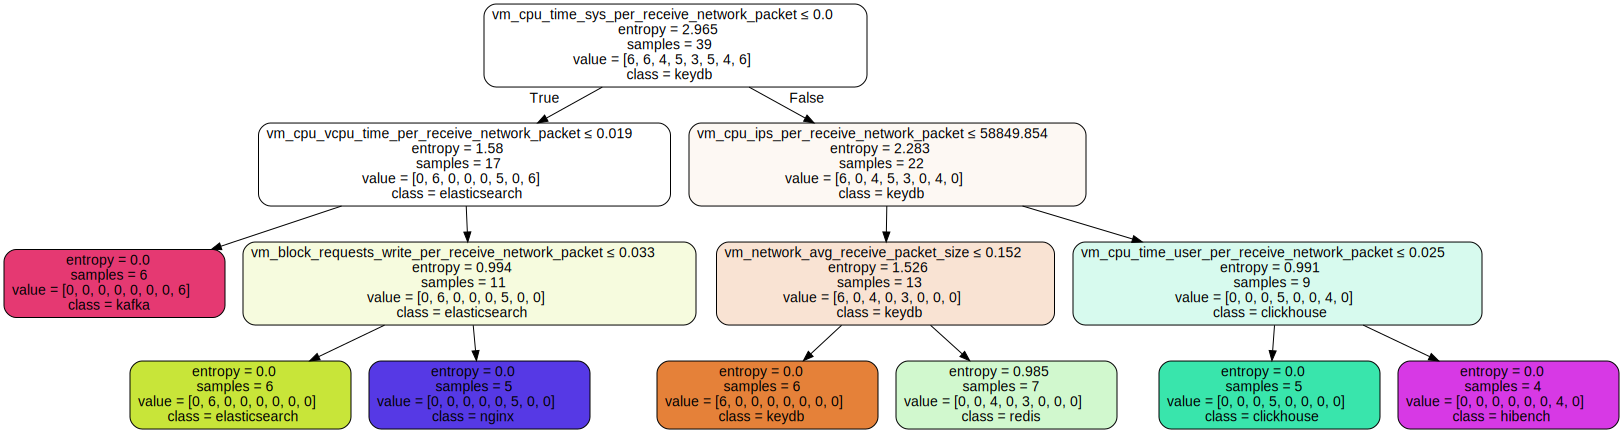

In [8]:
# model optimization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

cv = 3
clf = tree.DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 2,3],
              'min_samples_split': [2],
              'min_samples_leaf': [1],
             'max_features': [0.90]}

# scores = cross_val_score(clf, X, Y, cv=cv, scoring="f1_macro")
# for i in range(0, 32):
grid_search = GridSearchCV(clf, parameters, cv=cv, scoring='f1_macro')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

common.model_score(best_model, x_test, y_test)
common.save_dt_to_png(f"best_tree", best_model, feature_names, class_names)

In [9]:
from sklearn import svm

clf = svm.SVC()
clf = clf.fit(common.normalize(x_train), y_train)

common.model_score(clf, common.normalize(x_test), y_test)

accuracy: 0.5882352941176471, recall_micro: 0.5882352941176471, f1_micro: 0.5882352941176471


In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

random_state = 160

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

k_means = KMeans(**common_params)
k_means.fit(common.normalize(X))

for i, label in enumerate(k_means.labels_):
    print(f"app: {apps[Y[i][0]]} label: {label}")

app: memcached label: 0
app: memcached label: 4
app: memcached label: 4
app: memcached label: 4
app: memcached label: 4
app: memcached label: 4
app: memcached label: 4
app: redis label: 4
app: redis label: 4
app: redis label: 0
app: redis label: 4
app: redis label: 4
app: redis label: 4
app: redis label: 0
app: nginx label: 0
app: nginx label: 0
app: nginx label: 0
app: nginx label: 0
app: nginx label: 0
app: nginx label: 0
app: nginx label: 0
app: kafka label: 1
app: kafka label: 1
app: kafka label: 1
app: kafka label: 1
app: kafka label: 1
app: kafka label: 1
app: kafka label: 1
app: hibench label: 6
app: hibench label: 6
app: hibench label: 6
app: hibench label: 6
app: hibench label: 6
app: hibench label: 6
app: hibench label: 6
app: elasticsearch label: 7
app: elasticsearch label: 7
app: elasticsearch label: 7
app: elasticsearch label: 7
app: elasticsearch label: 7
app: elasticsearch label: 7
app: elasticsearch label: 7
app: keydb label: 0
app: keydb label: 0
app: keydb label: 0
ap

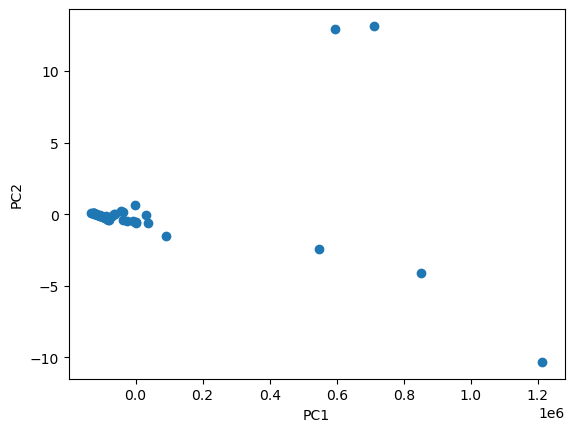

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 假设你有一个名为X的高维特征向量

# 使用PCA降维为2维
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

# 绘制散点图，并根据聚类结果着色
plt.scatter(reduced_X[:, 0], reduced_X[:, 1],)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [8]:
import json

start = 1000
end = 60000
step = 1000

array = list(range(start, end+1, step))


json_string = json.dumps(array)
print(json_string)

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000]
